In [28]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
from numpy import *
from matplotlib.pyplot import *

In [134]:
zoneAnalysis = "Japan"
#zoneAnalysis = "Gulf of Mexico"
maxLon, minLon, maxLat, minLat = 0,0,0,0
minYear = 1998
maxYear = 2015

if (zoneAnalysis == "Gulf of Mexico"):
    maxLon = 280
    minLon = 258
    maxLat = 30
    minLat = 18
else:
    maxLon = 145
    minLon = 120
    maxLat = 40
    minLat = 20

In [111]:
# function to plot images
def plot_im(lon,lat,im,size_points,var_name):

    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)

    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='robin',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)

    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    #im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)

# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

# IBTRACS Dataset loading

In [106]:
data = pd.read_csv("data/ibtracs.since1980.list.v04r00.csv")
data.drop(index=[0], inplace=True)

C:\Users\guyll\AppData\Local\Temp\ipykernel_14780\1609384494.py:1: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/ibtracs.since1980.list.v04r00.csv")


In [163]:
#time conversion
data.SEASON = data.SEASON.astype("int32")

#coord conversion
data.LAT = data.LAT.astype("float32")
data.LAT = data.LAT.round(3)
data.LON = data.LON.astype("float32")
data.LON = data.LON.round(3)
data.loc[data.LON < 0, 'LON'] = data[data.LON < 0].LON + 360

#category creation
#using wind speed from USA_WIND (instead of WMO_WIND) since there are less unknown data
#print(data.USA_WIND.describe())
#print(data.WMO_WIND.describe())

data.loc[data.USA_WIND == ' ', "USA_WIND"] = "-1"
data['USA_WIND'] = data['USA_WIND'].astype("float32")
windSpeedBins = [-10, 0, 34, 64, 83, 96, 113, 137, 300]
categoryLabels = ["Unknown", "TD", "TS", "1", "2", "3", "4", "5"]
data["CATEGORY"] = pd.cut(data['USA_WIND'], bins=windSpeedBins, labels=categoryLabels)

dataTime = data[(data.SEASON >= minYear) & (data.SEASON <= maxYear)]
dataSpace = dataTime[(dataTime.LON > minLon) & (dataTime.LON < maxLon) & (dataTime.LAT > minLat) & (dataTime.LAT < maxLat)]
dataSpace.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR,CATEGORY
133068,1998187N17132,1998,35,WP,MM,NOT_NAMED,1998-07-08 06:00:00,TS,20.086000,129.000000,...,,,,,,,,4,317,TD
133069,1998187N17132,1998,35,WP,MM,NOT_NAMED,1998-07-08 09:00:00,TS,20.254000,128.858002,...,,,,,,,,5,322,TD
133070,1998187N17132,1998,35,WP,MM,NOT_NAMED,1998-07-08 12:00:00,TS,20.450001,128.699997,...,,,,,,,,5,325,TD
133071,1998187N17132,1998,35,WP,MM,NOT_NAMED,1998-07-08 15:00:00,TS,20.632000,128.574997,...,,,,,,,,4,326,TD
133072,1998187N17132,1998,35,WP,MM,NOT_NAMED,1998-07-08 18:00:00,TS,20.799999,128.449997,...,,,,,,,,4,322,TD


In [170]:
typhoonsMapData = dataSpace[["LAT", "LON", "SID"]].groupby(["SID"], as_index=False).mean()

len(typhoonsMapData)

277

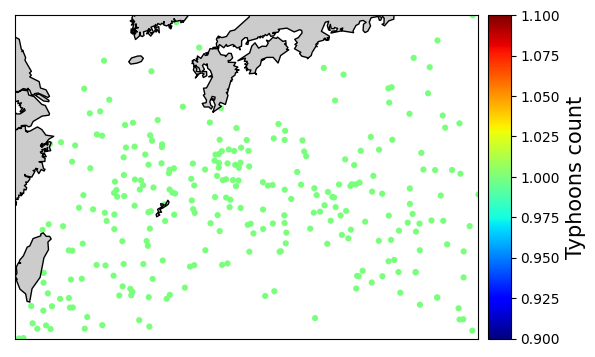

In [171]:
plot_im(typhoonsMapData.LON, typhoonsMapData.LAT, [1 for i in range(len(typhoonsMapData))], 20, "Typhoons count")